Part (a): Intercept Equivalence
Maximum differences between predictions:
Method 1 vs 2: 8.881784197001252e-16
Method 1 vs 3: 3.774758283725532e-15
Method 2 vs 3: 3.774758283725532e-15

Part (b): Zero Training Error when p > n

Training MSE with 100 features and 50 samples:
MSE: 0.0000000000

Part (c): Correlated Features Properties

OLS coefficient of variation: [0.277547   0.64797038]

Lasso coefficients (alpha=0.5): [1.7361568  0.66934378]

Lasso coefficients (alpha=1.0): [1.48352068 0.41956772]

Lasso coefficients (alpha=1.5): [1.23109864 0.16957961]

Lasso coefficients (alpha=2.5): [0.39893939 0.        ]


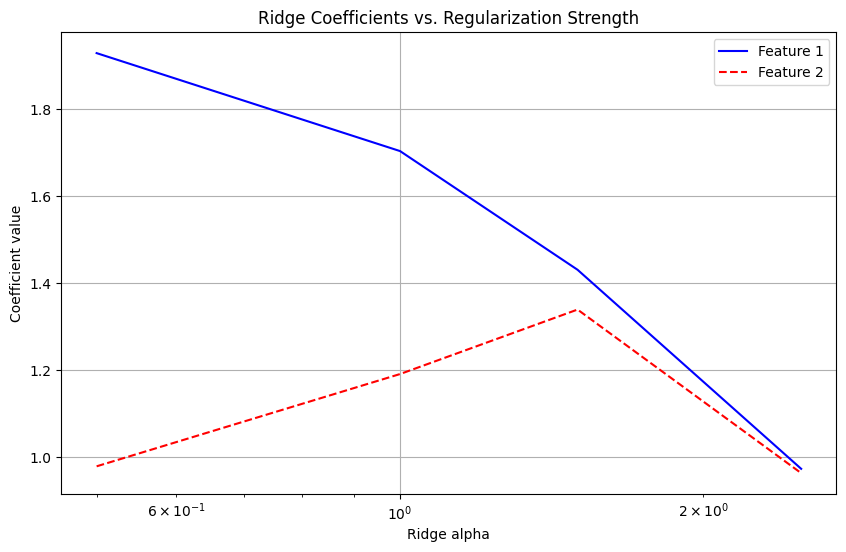

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
np.random.seed(42)

def demonstrate_intercept_equivalence(n_samples=100, n_features=3):
    """
    Demonstrates equivalence of different intercept handling methods
    """
    # Generate random data
    X = np.random.randn(n_samples, n_features)
    true_coef = np.random.randn(n_features)
    true_intercept = 2.5
    y = X @ true_coef + true_intercept + np.random.randn(n_samples) * 0.1
    
    # Method 1: Standard with intercept
    model1 = LinearRegression()
    model1.fit(X, y)
    pred1 = model1.predict(X)
    
    # Method 2: Centered data
    X_centered = X - X.mean(axis=0)
    y_centered = y - y.mean()
    model2 = LinearRegression(fit_intercept=False)
    model2.fit(X_centered, y_centered)
    pred2 = model2.predict(X_centered) + y.mean()
    
    # Method 3: Adding column of ones
    X_with_ones = np.hstack([np.ones((n_samples, 1)), X])
    model3 = LinearRegression(fit_intercept=False)
    model3.fit(X_with_ones, y)
    pred3 = model3.predict(X_with_ones)
    
    # Compare results
    print("Maximum differences between predictions:")
    print("Method 1 vs 2:", np.max(np.abs(pred1 - pred2)))
    print("Method 1 vs 3:", np.max(np.abs(pred1 - pred3)))
    print("Method 2 vs 3:", np.max(np.abs(pred2 - pred3)))

def demonstrate_zero_training_error(n_samples=50, n_features=100):
    """
    Demonstrates zero training error when p > n
    """
    # Generate random data
    X = np.random.randn(n_samples, n_features)
    y = np.random.randn(n_samples)
    
    # Fit model
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)
    pred = model.predict(X)
    
    # Calculate training error
    train_error = np.mean((y - pred) ** 2)
    print(f"\nTraining MSE with {n_features} features and {n_samples} samples:")
    print(f"MSE: {train_error:.10f}")
    
    return train_error

def demonstrate_correlated_features():
    """
    Demonstrates properties of correlated features for different methods
    """
    # Generate correlated features
    n_samples = 100
    rho = 0.99  # correlation coefficient
    
    # Create two highly correlated features
    x1 = np.random.randn(n_samples)
    x2 = rho * x1 + np.sqrt(1 - rho**2) * np.random.randn(n_samples)
    X = np.column_stack([x1, x2])
    
    # Scale features to have unit variance
    X = X / np.std(X, axis=0)
    
    # True coefficients
    beta_true = np.array([1, 2])
    # Generate response with moderate noise
    y = X @ beta_true + np.random.randn(n_samples)
    
    # Function to compute coefficient estimates through bootstrap
    def compute_coef_stats(model_class, **kwargs):
        n_bootstrap = 1000
        coefs = []
        for _ in range(n_bootstrap):
            idx = np.random.choice(n_samples, n_samples, replace=True)
            X_boot, y_boot = X[idx], y[idx]
            model = model_class(**kwargs)
            model.fit(X_boot, y_boot)
            coefs.append(model.coef_)
        coefs = np.array(coefs)
        # Calculate coefficient of variation (std/mean)
        cv = np.std(coefs, axis=0) / np.mean(coefs, axis=0)
        return cv
    
    # 1. Demonstrate high variance in OLS
    ols_cv = compute_coef_stats(LinearRegression)
    print("\nOLS coefficient of variation:", ols_cv)
    
    # 2. Demonstrate Ridge grouping
    alphas = [0.1, 1, 10, 100]
    ridge_coefs = []
    for alpha in alphas:
        ridge = Ridge(alpha=alpha)
        ridge.fit(X, y)
        ridge_coefs.append(ridge.coef_)
    ridge_coefs = np.array(ridge_coefs)
    
    # 2. Demonstrate Lasso selection
    alphas = [0.5, 1.0, 1.5, 2.5]
    for alpha in alphas:
        lasso = Lasso(alpha=alpha)
        lasso.fit(X, y)
        print(f"\nLasso coefficients (alpha={alpha}):", lasso.coef_)
    
    # Plotting for ridge coefficients
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, ridge_coefs[:, 0], 'b-', label='Feature 1')
    plt.plot(alphas, ridge_coefs[:, 1], 'r--', label='Feature 2')
    plt.xscale('log')
    plt.xlabel('Ridge alpha')
    plt.ylabel('Coefficient value')
    plt.title('Ridge Coefficients vs. Regularization Strength')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run demonstrations
print("Part (a): Intercept Equivalence")
demonstrate_intercept_equivalence()

print("\nPart (b): Zero Training Error when p > n")
demonstrate_zero_training_error()

print("\nPart (c): Correlated Features Properties")
demonstrate_correlated_features()